In [1]:

USER = "macbook"
INTERACTIVE = False

# deal with matplotlib interactive state and backend
if not INTERACTIVE:
    %matplotlib inline
    

import brian2 as brian    
import matplotlib.pylab as plt
import numpy as np
import dill as pickle
import os
import sys
from importlib import reload

if USER == 'macbook':
    DATA_DIR = "/Users/charliehass/Box Sync/Syncd Lab Stuff/hva_sim_data/"
    sys.path.insert(0, "/Users/charliehass/github/hvasim/analysis")
elif USER == 'mint':
    DATA_DIR = '/home/charlie/Dropbox/Duke on Dropbox/hva_sim_data/'
    sys.path.insert(0, '/home/charlie/Documents/CodeRepos/hvasim/analysis')
elif USER == 'nuke':
    DATA_DIR = r"\\crash.dhe.duke.edu\charlie\hva_sim_data" + os.sep
    sys.path.insert(0, r"C:\Users\charlie\Documents\SourceTree_local\hvasim\analysis")


import analysis as anly
reload(anly);



In [2]:
""" Load in the data files and print the description """

# enter the name of the directory that has the data files
simulation_dir_name = "2017_297_2_30"

sim_path = DATA_DIR + simulation_dir_name + os.sep
file_names = os.listdir(sim_path)
file_names = [x for x in file_names if x.endswith('.p')] # cull any non-sim data like .pdfs..
all_data = anly.load_all_files(file_names, sim_path)

# load the monitors
anlg_mon, neuron_names = anly.extract_anlg_monitors(all_data, mon_type="Ge_total")
spk_mon, neuron_names = anly.extract_spk_monitors(all_data, binsize=0.025)
afferent_mon = anly.extract_afferent_monitors(all_data,  binsize=0.001) # small binsize for accurate average psth


fnames = list(all_data.keys())
print(all_data[fnames[0]]["description"])


hack for sim_time:  45
hack for sim_time:  9
hack for sim_time:  4
hack for sim_time:  2

Test: new passive props
* sinusoidal inputs (peak rate = 50Hz)
* using passive props for PY, FS, SOM cells
* using empirical tau_epsc
* using membrane eq that incorporates the Rin
* spiking output from FS and SOM cells with possibly realistic pA EPSCs
* adjusted the SOM scalefact down and the PV scalefact up (now 5x)
* using roughly empirical STP for SOM and PV+ cells



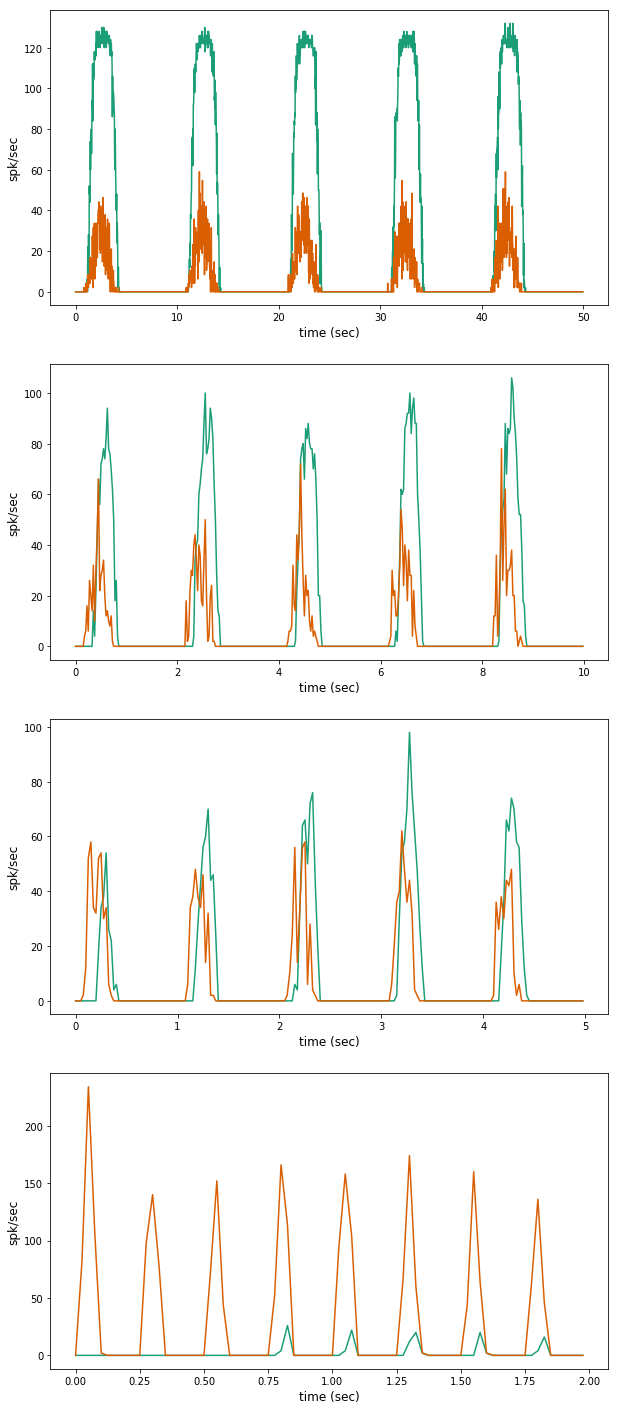

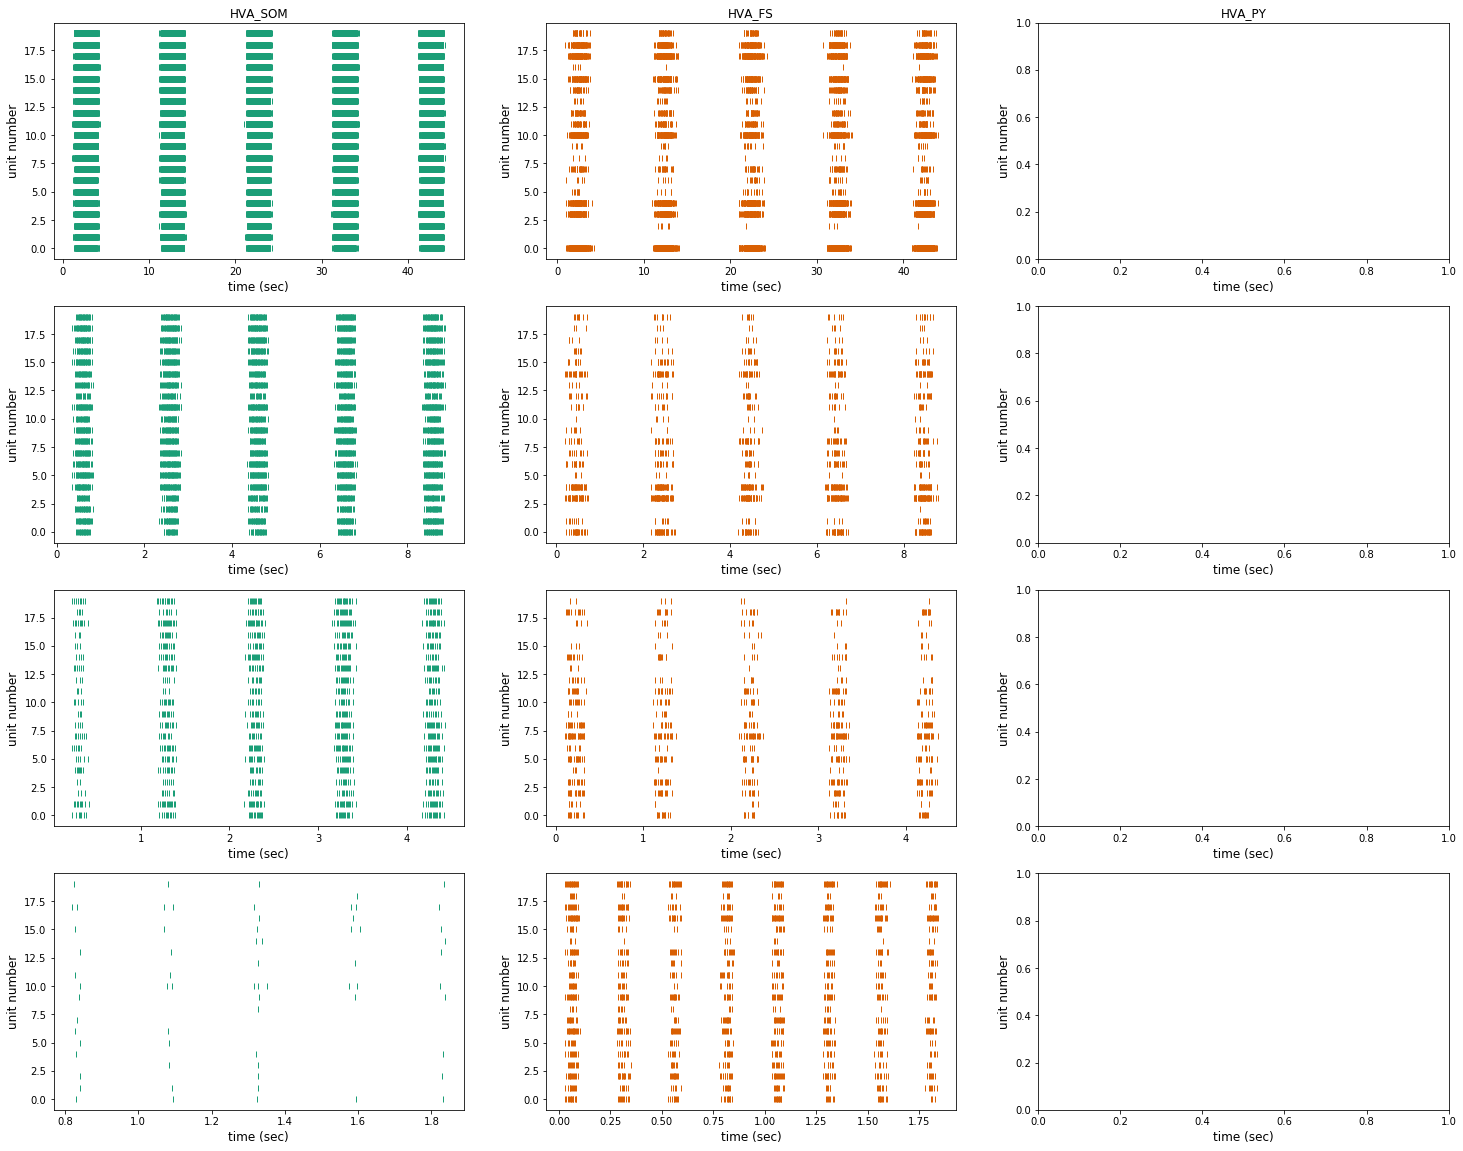

In [4]:
""" Extract monitors and make summary figure """

# ***** HVA NEURONS ****** #

# plot the analog montor (V, or Ge_total or Gi_total)
if False:
    fig, axs = anly.plot_anlg_summary(anlg_mon, neuron_names, plot_type="grid")
    #[a.set_xlim(0, 0.015) for a in axs.ravel()]
    fig.savefig("{}model_vm_response_{}.pdf".format(sim_path, simulation_dir_name)
                , bbox_inches='tight'
               )
    plt.show()
    
# plot PSTH of HVA neuron spiking
if True:
    fig, axs, = anly.plot_spk_summary(spk_mon,
                                      neuron_names,
                                      plot_type="overlay",
                                      average=True
                                     )
    fig.savefig("{}model_HVA_PSTH_{}.pdf".format(sim_path, simulation_dir_name)
                , bbox_inches='tight'
               )
    plt.show()
    

# plot HVA neuron rasters
if True:
    fig, axs = anly.plot_hva_rasters(spk_mon, neuron_names)
    fig.savefig("{}hva_rasters_{}.pdf".format(sim_path, simulation_dir_name),
                bbox_inches='tight'
               )
    plt.show()



# ***** V1 AFFERENTS ****** #

# plot afferent spike rasters
if False:
    fig, axs = anly.plot_afferent_rasters(afferent_mon)
    fig.savefig("{}afferent_rasters_{}.pdf".format(sim_path, simulation_dir_name),
                bbox_inches='tight'
               )
    plt.show()
    
# plot afferent spike PSTH
if False:
    fig, axs = anly.plot_spk_summary(afferent_mon, ["afferents"],
                                     plot_type="overlay",
                                     average=True
                                    )
    mod_rate = all_data[fnames[0]]['settings']['afferents']['peak_rate']
    [a.set_title("peak_rate: " + str(mod_rate)) for a in axs]
    fig.savefig("{}afferent_PSTH_{}.pdf".format(sim_path, simulation_dir_name),
                bbox_inches='tight'
               )
    plt.show()


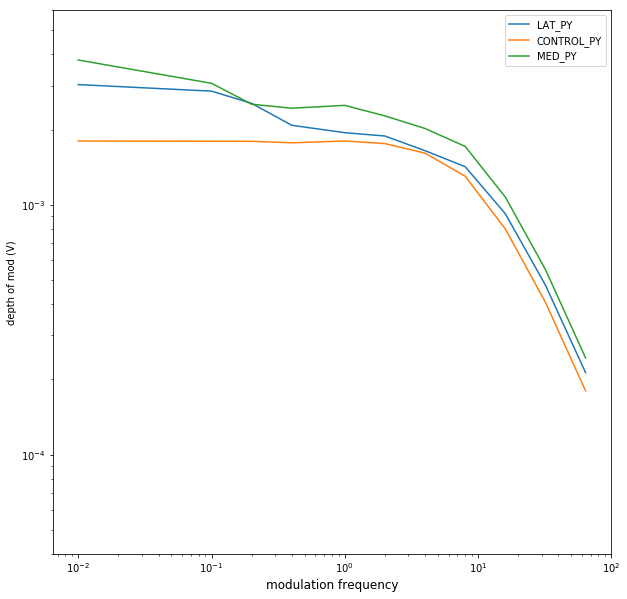

In [4]:
""" PLOT THE FREQUENCY RESPONSE   """

anlg_mon, neuron_names = anly.extract_anlg_monitors(all_data, mon_type="V")

tf_dict = anly.get_looped_param_list(all_data, "afferents/modulation_rate")
dt = [all_data[x]['net'][neuron_names[0]]['dt'] for x in all_data.keys()]
samp_rates = 1 / np.array(dt / brian.units.second) # now in samps/sec

dom_dict = anly.get_all_dat_dom(anlg_mon, neuron_names, samp_rates, tf_dict)

fig, ax = anly.plot_frequency_response(dom_dict, plot_type="overlay")
ax.set_ylim(4e-5, 6e-3)
plt.show()

fig.savefig("{}freq_resp_{}.pdf".format(sim_path, simulation_dir_name),
            bbox_inches='tight'
           )


In [ ]:
tt = np.arange(1000) / 1000
sinwave = np.sin(2*np.pi*5*tt)
sinwave[sinwave<0] = 0
fig, ax = plt.subplots(1,1)
ax.plot(tt, sinwave, '-k')
plt.show()
fig.savefig("rectified_sin_wave.pdf", bbox_inches="tight")

In [ ]:
amp = 1
dc = 4
sinf = 10
samp_freq = 10000
nsec = 3
tt = np.arange(nsec*samp_freq) / samp_freq
ts = np.sin(2 * np.pi * tt * sinf) * amp + dc
anly.calculate_depth_of_mod(ts, baseline=0, freq=10, samp_freq=10000)
